In [1]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from gensim.models import word2vec , Phrases
import numpy as np
import gensim
from multiprocessing import cpu_count
from nltk.tokenize import sent_tokenize, word_tokenize 
import pandas as pd
import nltk

In [2]:
modelo1 = Word2Vec.load('Modelo\modelo_200_4.model')

In [3]:
def getFV(document, model1): #promedio del vector caracteristico
    
    words=document.split()
    s=np.zeros(model1.vector_size)
    k=1
    for w in words:
        if w in model1.wv.vocab:
            s=s+model1[w]
            k=k+1
    
    return s/k

In [4]:
df_noticias_train = pd.read_csv('NOTICIAS_3P_CLEAN.csv')
df_noticias_train.head()

,Fecha,Categoria,Autor,Titulo,Resumen,Contenido
0,2019-09-24 10:04:00,farándula,redacción perú21,fiorella rodríguez presentó dueño corazón tres...,conductora sorprendió fanáticos fotos nuevo am...,presentadora exjurado artista año fiorella rod...
1,2019-09-24 09:33:00,perú,redacción perú21,sujeto arrojó thinner padre 68 años luego pren...,joven negó haber incendiado padre embargo víct...,wandherlay enriquez luque 25 detenido luego ha...
2,2019-09-24 09:31:00,política,redacción perú21,luis bedoya reyes llama abogados juristas inte...,político 100 años pronunció importancia postul...,luis bedoya reyes fundadores históricos partid...
3,2019-09-24 09:28:00,lima,redacción perú21,separan tres responsables difundir fotos expre...,tres involucrados hospital casimiro ulloa susp...,doctor juan luis herrera director general oper...
4,2019-09-24 09:13:00,lima,redacción perú21,así reaccionó john galliquio tras ser cuestion...,exjugador selección peruana reapareció mostró ...,john galliquio exjugador selección peruana apa...


In [6]:
df_noticias_train = df_noticias_train.dropna()
df_noticias_train['Vector'] = df_noticias_train['Contenido'].apply(lambda x: getFV(x,modelo1))

C:\Users\MSI\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [7]:
df_noticias_train.head()

,Fecha,Categoria,Autor,Titulo,Resumen,Contenido,Vector
0,2019-09-24 10:04:00,farándula,redacción perú21,fiorella rodríguez presentó dueño corazón tres...,conductora sorprendió fanáticos fotos nuevo am...,presentadora exjurado artista año fiorella rod...,"[0.20763278275888453, -0.47719199747167607, 0...."
1,2019-09-24 09:33:00,perú,redacción perú21,sujeto arrojó thinner padre 68 años luego pren...,joven negó haber incendiado padre embargo víct...,wandherlay enriquez luque 25 detenido luego ha...,"[-0.36921957434412644, 0.03442062652283447, -0..."
2,2019-09-24 09:31:00,política,redacción perú21,luis bedoya reyes llama abogados juristas inte...,político 100 años pronunció importancia postul...,luis bedoya reyes fundadores históricos partid...,"[-0.09979109307730935, -0.16131625813989345, 0..."
3,2019-09-24 09:28:00,lima,redacción perú21,separan tres responsables difundir fotos expre...,tres involucrados hospital casimiro ulloa susp...,doctor juan luis herrera director general oper...,"[-0.11373750939649546, -0.008561981376260519, ..."
4,2019-09-24 09:13:00,lima,redacción perú21,así reaccionó john galliquio tras ser cuestion...,exjugador selección peruana reapareció mostró ...,john galliquio exjugador selección peruana apa...,"[-0.09159937198273838, -0.1850425939722781, 0...."


### Funcion para Gráfico de Siluetas

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def grafico_silueta(modelo, data_X, n_clusters):
  # ----------------- Definicion de figura -----------------------------------
  # Crea los subplots para mostrar la figura
  # Especifica tamaños para la figura
  fig, (ax1) = plt.subplots(1, 1) 
  fig.set_size_inches(9, 7) 
  
  # ----------------- Definicion de limites -----------------------------------
  # Limites en X del grafico de siluetas
  # Los limites de Y se incrementan (n_clusters+1)*10, para dejar 
  # espacio entre siluetas
  ax1.set_xlim([-0.1, 1]) 
  ax1.set_ylim([0, len(data_X) + (n_clusters + 1) * 10])

  # ----------------- Predicción de Clases ------------------------------------
  # Se predicen los valores, el puntaje de silueta promedio y elpuntaje silueta
  # de cada muestra 
  cluster_labels = modelo.predict(data_X)
  silhouette_avg = silhouette_score(data_X, cluster_labels)
  sample_silhouette_values = silhouette_samples(data_X, cluster_labels)

  # ----------------- Ploteo de Gráfico ---------------------------------------
  y_lower = 10
  for i in range(n_clusters):
    # Se agregan los valores de la silueta 'i' y se ordenan
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    #Se hallan el numero de muestras y se suma al lower
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

### Entrenamiento del algoritmo KMeans

Se entrenaran varios modelos de KMeans con el 80% de la data.

In [11]:
from sklearn.model_selection import train_test_split

X = list(df_noticias_train['Vector'])
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)
print(len(X), len(X_train), len(X_test))

91970 73576 18394


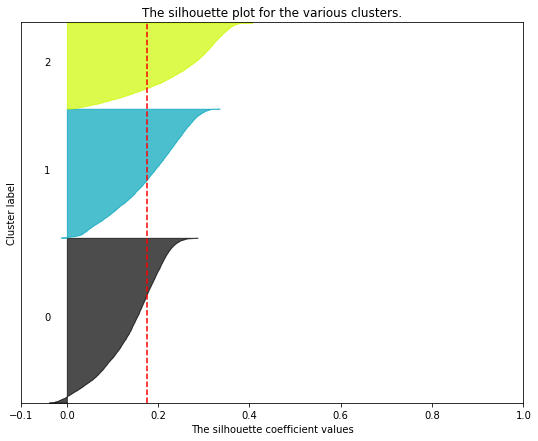

In [12]:
nc = 3
kmeans = KMeans(n_clusters=nc, random_state=0)
kmeans.fit(X_train)
grafico_silueta(kmeans, X_test, nc)

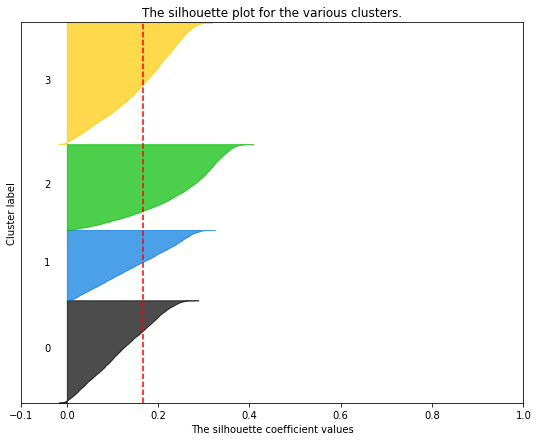

In [13]:
nc = 4
kmeans = KMeans(n_clusters=nc, random_state=0)
kmeans.fit(X_train)
grafico_silueta(kmeans, X_test, nc)

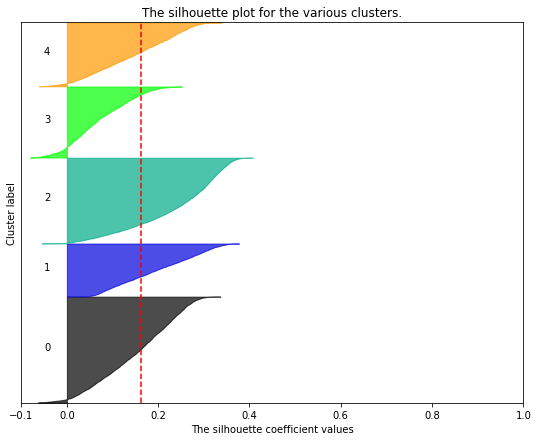

In [14]:
nc = 5
kmeans = KMeans(n_clusters=nc, random_state=0)
kmeans.fit(X_train)
grafico_silueta(kmeans, X_test, nc)

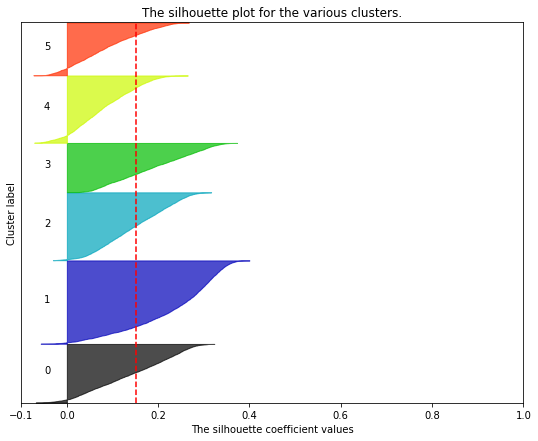

In [15]:
nc = 6
kmeans = KMeans(n_clusters=nc, random_state=0)
kmeans.fit(X_train)
grafico_silueta(kmeans, X_test, nc)